In [1]:
# Resources
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Start Here
life_exp_df = pd.read_csv('Life_Expectancy_Data.csv')
life_exp_df.columns = [col.strip() for col in life_exp_df.columns]
happiness_df = pd.read_csv('Happiness_Consolidated.csv')
happiness_df.columns = [col.strip() for col in happiness_df.columns]

In [4]:
life_exp_df.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,5,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
mean_life_exp = life_exp_df.groupby("Country").mean()
std_life_exp = life_exp_df.groupby("Country").std()

In [6]:
happy_mean_life = happiness_df.groupby("Country").mean()
happy_std_life = happiness_df.groupby("Country").std()

In [7]:
happy_mean_life.loc["Algeria"]["Family"]

1.074205493

In [8]:
mean_life_exp.head()

,ID,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.5,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,24.5,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,40.5,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,56.5,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,72.5,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [9]:
from scipy.stats import norm
def random_values_life_exp(country, input_column, samples=100):
    mean = mean_life_exp.loc[country][input_column]
    std = std_life_exp.loc[country, input_column]
    return pd.DataFrame({"country": [country], input_column: [norm.rvs(size=samples, loc=mean, scale=std)]}).explode(input_column)

def empty_values(country, input_column, samples=100):
    nan_list = [np.nan for i in range(samples)]
    return pd.DataFrame({"country": [country], input_column: [nan_list]}).explode(input_column)

In [10]:
from functools import reduce
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [11]:
mean_life_exp.columns

Index(['ID', 'Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
# if you don't want country_x, country_y columns
# don't drop the index when doing eset_index in next cell
join_df_func = lambda df1, df2: pd.merge(df1, df2, on=["index", "country"], how="inner")

In [13]:
countries = mean_life_exp.index
input_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']
all_col_dfs = []
for input_col in input_cols:
    life_exp_dfs = []
    for country in countries:
    
        try:
            life_exp_dfs.append(random_values_life_exp(country, input_col, samples=100))
        except:
            # needed so rows match by index
            empty_df = empty_values(country, input_col, samples=100)
            life_exp_dfs.append(empty_df)
    if len(life_exp_dfs):
        # setting drop = False makes a new column called index that we can join on
        # kind of dumb but drop the old index and create a new one that is 0, 1, 2, ...
        # then drop it again but keep it as a column too
        df = pd.concat(life_exp_dfs).reset_index(drop=True).reset_index(drop=False)
        all_col_dfs.append(df)
life_exp_montecarlo_exp_hep = reduce(join_df_func, all_col_dfs)
life_exp_montecarlo_exp_hep.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,59.7456,196.155,78.1758,0.00735079,104.857,67.1445,-88.9193,17.254,87.5397,32.3882,8.31474,47.2996,0.1,206.961,1.66596e+06,16.8436,8.75404,0.502991,8.15091
1,1,Afghanistan,59.3309,123.183,55.5738,0.0151753,83.4081,66.9444,967.714,16.8577,89.5977,52.3703,7.38654,64.8279,0.1,290.159,1.21783e+07,10.0871,6.18387,0.327689,7.40331
2,2,Afghanistan,58.2098,271.229,85.4215,0.0083316,21.2961,65.416,4286.17,14.7042,135.004,58.9416,8.2781,51.4412,0.1,236.113,-4.22856e+06,19.6726,15.8971,0.522268,6.13652
3,3,Afghanistan,54.395,186.886,76.7876,0.00247185,97.1303,64.8674,-1225.05,19.5502,104.107,70.337,8.93121,34.1644,0.1,245.43,6.81652e+06,14.2156,9.44568,0.450464,6.79917
4,4,Afghanistan,54.7561,181.432,82.5319,0.0133542,14.184,64.6283,-1593.65,11.9062,92.746,20.4119,8.76032,70.0921,0.1,598.739,-1.76561e+07,19.1672,6.87801,0.50139,5.58677


In [14]:
len(life_exp_montecarlo_exp_hep)

19300

In [15]:
life_exp_montecarlo_exp_hep = life_exp_montecarlo_exp_hep.dropna()
life_exp_montecarlo_exp_hep.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,59.7456,196.155,78.1758,0.00735079,104.857,67.1445,-88.9193,17.254,87.5397,32.3882,8.31474,47.2996,0.1,206.961,1.66596e+06,16.8436,8.75404,0.502991,8.15091
1,1,Afghanistan,59.3309,123.183,55.5738,0.0151753,83.4081,66.9444,967.714,16.8577,89.5977,52.3703,7.38654,64.8279,0.1,290.159,1.21783e+07,10.0871,6.18387,0.327689,7.40331
2,2,Afghanistan,58.2098,271.229,85.4215,0.0083316,21.2961,65.416,4286.17,14.7042,135.004,58.9416,8.2781,51.4412,0.1,236.113,-4.22856e+06,19.6726,15.8971,0.522268,6.13652
3,3,Afghanistan,54.395,186.886,76.7876,0.00247185,97.1303,64.8674,-1225.05,19.5502,104.107,70.337,8.93121,34.1644,0.1,245.43,6.81652e+06,14.2156,9.44568,0.450464,6.79917
4,4,Afghanistan,54.7561,181.432,82.5319,0.0133542,14.184,64.6283,-1593.65,11.9062,92.746,20.4119,8.76032,70.0921,0.1,598.739,-1.76561e+07,19.1672,6.87801,0.50139,5.58677


In [16]:
# Happines data
def random_happiness(country, input_column, samples=100):
    mean = happy_mean_life.loc[country][input_column]
    std = happy_std_life.loc[country, input_column]
    return pd.DataFrame({"country": [country], input_column: [norm.rvs(size=samples, loc=mean, scale=std)]}).explode(input_column)

def happiness_empty_values(country, input_column, samples=100):
    nan_list = [np.nan for i in range(samples)]
    return pd.DataFrame({"country": [country], input_column: [nan_list]}).explode(input_column)

In [17]:
join_df_func_2 = lambda df3, df4: pd.merge(df3, df4, on=["index", "country"], how="inner")

In [18]:
happy_mean_life.columns

Index(['ID', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [19]:
countries_2 = happy_mean_life.index
input_cols_2 = ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
all_col_dfs_2 = []
for input_col_2 in input_cols_2:
    happy_dfs = []
    for country in countries:
    
        try:
            happy_dfs.append(random_happiness(country, input_col_2, samples=100))
        except:
            # needed so rows match by index
            empty_df_2 = happiness_empty_values(country, input_col_2, samples=100)
            happy_dfs.append(empty_df_2)
    if len(happy_dfs):
        # setting drop = False makes a new column called index that we can join on
        # kind of dumb but drop the old index and create a new one that is 0, 1, 2, ...
        # then drop it again but keep it as a column too
        df_2 = pd.concat(happy_dfs).reset_index(drop=True).reset_index(drop=False)
        all_col_dfs_2.append(df_2)
happiness_mean = reduce(join_df_func_2, all_col_dfs_2)
happiness_mean.head()

,index,country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,153.71,3.59797,3.8385,2.84252,0.297603,-0.0430918,0.370627,0.151878,0.081773,0.0981588,1.9916
1,1,Afghanistan,150.017,3.29216,3.51346,3.62727,0.34158,0.654571,0.21574,-0.0107808,0.0703597,0.147651,2.12806
2,2,Afghanistan,148.171,3.20322,3.59325,3.25178,0.382362,0.264488,0.285335,0.188695,0.0480298,0.330053,1.90553
3,3,Afghanistan,151.293,3.35071,2.96716,3.79943,0.393785,0.496244,0.324108,0.11155,0.113656,0.455149,2.04725
4,4,Afghanistan,158.955,3.79715,3.47627,3.72107,0.354037,0.282242,0.230205,0.0596435,-0.0185838,0.32423,1.98363


In [20]:
len(happiness_mean)

19300

In [21]:
happiness_mean = happiness_mean.dropna()
happiness_mean.head()

,index,country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,153.71,3.59797,3.8385,2.84252,0.297603,-0.0430918,0.370627,0.151878,0.081773,0.0981588,1.9916
1,1,Afghanistan,150.017,3.29216,3.51346,3.62727,0.34158,0.654571,0.21574,-0.0107808,0.0703597,0.147651,2.12806
2,2,Afghanistan,148.171,3.20322,3.59325,3.25178,0.382362,0.264488,0.285335,0.188695,0.0480298,0.330053,1.90553
3,3,Afghanistan,151.293,3.35071,2.96716,3.79943,0.393785,0.496244,0.324108,0.11155,0.113656,0.455149,2.04725
4,4,Afghanistan,158.955,3.79715,3.47627,3.72107,0.354037,0.282242,0.230205,0.0596435,-0.0185838,0.32423,1.98363


In [22]:
#merge = (life_exp_montecarlo_exp_hep, happiness_df)
#new_merge_df = pd.concat(merge)
#new_merge_df.head()
new_merge_df = pd.merge(life_exp_montecarlo_exp_hep, happiness_mean, on=["index", "country"], how="inner")
new_merge_df.head()

,index,country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Afghanistan,59.7456,196.155,78.1758,0.00735079,104.857,67.1445,-88.9193,17.254,87.5397,32.3882,8.31474,47.2996,0.1,206.961,1.66596e+06,16.8436,8.75404,0.502991,8.15091,153.71,3.59797,3.8385,2.84252,0.297603,-0.0430918,0.370627,0.151878,0.081773,0.0981588,1.9916
1,1,Afghanistan,59.3309,123.183,55.5738,0.0151753,83.4081,66.9444,967.714,16.8577,89.5977,52.3703,7.38654,64.8279,0.1,290.159,1.21783e+07,10.0871,6.18387,0.327689,7.40331,150.017,3.29216,3.51346,3.62727,0.34158,0.654571,0.21574,-0.0107808,0.0703597,0.147651,2.12806
2,2,Afghanistan,58.2098,271.229,85.4215,0.0083316,21.2961,65.416,4286.17,14.7042,135.004,58.9416,8.2781,51.4412,0.1,236.113,-4.22856e+06,19.6726,15.8971,0.522268,6.13652,148.171,3.20322,3.59325,3.25178,0.382362,0.264488,0.285335,0.188695,0.0480298,0.330053,1.90553
3,3,Afghanistan,54.395,186.886,76.7876,0.00247185,97.1303,64.8674,-1225.05,19.5502,104.107,70.337,8.93121,34.1644,0.1,245.43,6.81652e+06,14.2156,9.44568,0.450464,6.79917,151.293,3.35071,2.96716,3.79943,0.393785,0.496244,0.324108,0.11155,0.113656,0.455149,2.04725
4,4,Afghanistan,54.7561,181.432,82.5319,0.0133542,14.184,64.6283,-1593.65,11.9062,92.746,20.4119,8.76032,70.0921,0.1,598.739,-1.76561e+07,19.1672,6.87801,0.50139,5.58677,158.955,3.79715,3.47627,3.72107,0.354037,0.282242,0.230205,0.0596435,-0.0185838,0.32423,1.98363


In [23]:
len(new_merge_df)

10800

In [24]:
new_merge_df.columns

Index(['index', 'country', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
# Split data into training and testing
X = new_merge_df[['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Happiness Rank','Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

y = new_merge_df['Happiness Score']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_predict = model.predict(X_test)
print(y_predict)

[3.1712849  6.64517812 5.97830055 ... 4.98423883 3.73894807 5.27572817]


In [49]:
print(y_test)

2059     3.04918
8058     6.74122
1287       5.956
2787     6.76521
10511    5.96365
          ...   
7295     4.30401
3604     6.49701
6947      5.1467
5893     3.38243
8584     4.83722
Name: Happiness Score, Length: 2700, dtype: object


In [50]:
#The range is between 3.073 and 7.3854
min(y_predict)

3.0729236536509967

In [51]:
max(y_predict)

7.385462921705445

               Life expectancy, Score: 0.00270
               Adult Mortality, Score: -0.00001
                 infant deaths, Score: -0.00005
                       Alcohol, Score: 0.00282
        percentage expenditure, Score: 0.00001
                   Hepatitis B, Score: -0.00038
                       Measles, Score: -0.00000
                           BMI, Score: -0.00010
             under-five deaths, Score: 0.00010
                         Polio, Score: -0.00034
             Total expenditure, Score: 0.00019
                    Diphtheria, Score: -0.00033
                      HIV/AIDS, Score: -0.00431
                           GDP, Score: 0.00000
                    Population, Score: -0.00000
          thinness  1-19 years, Score: -0.00305
            thinness 5-9 years, Score: -0.00459
Income composition of resources, Score: 0.00848
                     Schooling, Score: -0.00167
                Happiness Rank, Score: -0.00502
     Lower Confidence Interval, Score: 0.29384

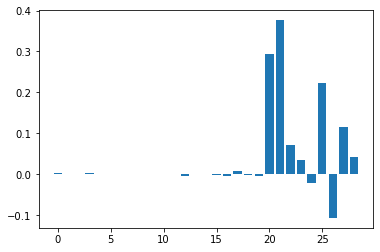

In [76]:
# Feature importance
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print ('%30s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [81]:
# Feature Importance into a dataframe
important_features = model.coef_
columns=X_train.columns
feature_import_df = pd.DataFrame({"feature":columns,"importance":important_features})
new_feature_df = feature_import_df.sort_values(by='importance',ascending=False)
new_feature_df = new_feature_df.round(5)
new_feature_df

,feature,importance
21,Upper Confidence Interval,0.37621
20,Lower Confidence Interval,0.29384
25,Freedom,0.22304
27,Generosity,0.11409
22,Economy (GDP per Capita),0.07213
28,Dystopia Residual,0.04058
23,Family,0.03388
17,Income composition of resources,0.00848
3,Alcohol,0.00282
0,Life expectancy,0.00270


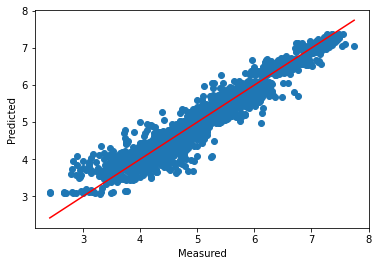

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()],"r-")
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()